In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("MY2022 Fuel Consumption Ratings.csv")
df.head(2)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [200]:
# 사용하기 편하게 컬럼이름 변경
df = df.rename({"Vehicle Class":"VC", "Fuel Consumption (City (L/100 km)": "FC_City",
                "Fuel Consumption(Hwy (L/100 km))": "FC_Hwy", "Fuel Consumption(Comb (L/100 km))":
                "FC_Comb", "Fuel Consumption(Comb (mpg))": "FC_CombMPG", "CO2 Emissions(g/km)":
                "CO2_Emission", "Fuel Type": "Fuel_Type", "CO2 Rating": "CO2_Rating",
                "Smog Rating": "Smog_Rating", "Engine Size(L)": "Engine_Size"}, axis=1)

In [225]:
df.head(10)

,Model Year,Make,Model,VC,Engine_Size,Cylinders,Transmission,Fuel_Type,FC_City,FC_Hwy,FC_Comb,FC_CombMPG,CO2_Emission,CO2_Rating,Smog_Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
5,2022,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231,5,7
6,2022,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,26,256,5,5
7,2022,Acura,TLX Type S (Performance Tire),Compact,3.0,6,AS10,Z,12.3,9.8,11.2,25,261,4,5
8,2022,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,32,205,6,3
9,2022,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,31,217,5,3


In [6]:
df.corr()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


In [77]:
# Model Year빼고 상관계수 확인
df1 = df.iloc[:, 1:]
df1.corr()

,Engine Size(L),Cylinders,FC_City,FC_Hwy,FC_Comb,FC_CombMPG,CO2_Emission,CO2 Rating,Smog Rating
Engine Size(L),1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
FC_City,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
FC_Hwy,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
FC_Comb,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
FC_CombMPG,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2_Emission,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


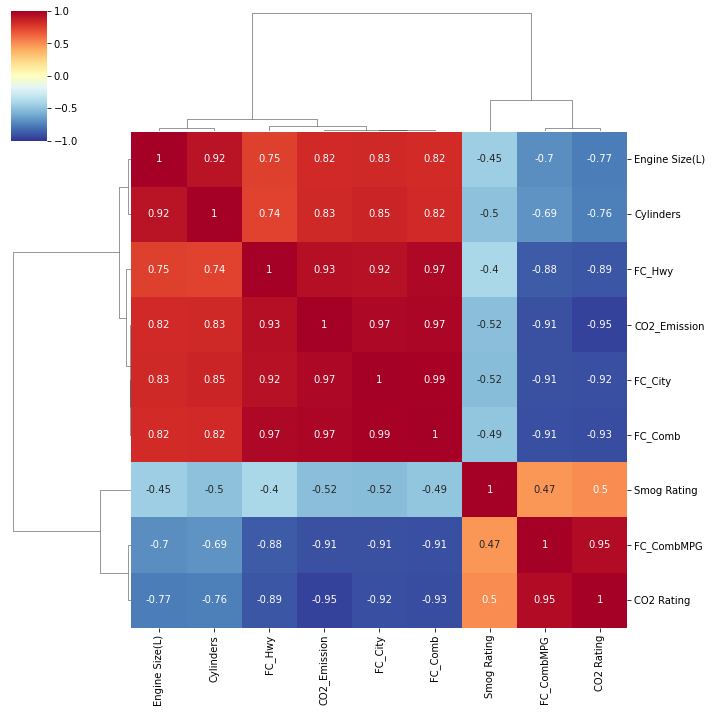

In [234]:
# 히트맵으로 보기
sns.clustermap(df1.corr(), 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )


In [42]:
# uniq 개수 확인
uniq = {i: (len(df[i].unique())) for i in df.columns}
print(uniq)    

{'Model Year': 1, 'Make': 39, 'Model': 715, 'VC': 14, 'Engine Size(L)': 36, 'Cylinders': 8, 'Transmission': 23, 'Fuel Type': 4, 'FC_City': 149, 'FC_Hwy': 107, 'FC_Comb': 131, 'FC_CombMPG': 49, 'CO2_Emission': 242, 'CO2 Rating': 10, 'Smog Rating': 5}


In [56]:
# 표로 만들어주기
uniq_counts = pd.Series(uniq).reset_index().rename({"index":"Feature", 0:"Unique_Counts"}, axis=1)
uniq_counts # 중요한 변수는 

,Feature,Unique_Counts
0,Model Year,1
1,Make,39
2,Model,715
3,VC,14
4,Engine Size(L),36
5,Cylinders,8
6,Transmission,23
7,Fuel Type,4
8,FC_City,149
9,FC_Hwy,107


In [ ]:
# 이렇게 쉬운방법이 있었거늘..
df.nunique().sort_values(ascending = False)

In [171]:
from statsmodels.formula.api import ols # ols로 다중회귀분석

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Model Year      946 non-null    int64  
 1   Make            946 non-null    object 
 2   Model           946 non-null    object 
 3   VC              946 non-null    object 
 4   Engine Size(L)  946 non-null    float64
 5   Cylinders       946 non-null    int64  
 6   Transmission    946 non-null    object 
 7   Fuel_Type       946 non-null    object 
 8   FC_City         946 non-null    float64
 9   FC_Hwy          946 non-null    float64
 10  FC_Comb         946 non-null    float64
 11  FC_CombMPG      946 non-null    int64  
 12  CO2_Emission    946 non-null    int64  
 13  CO2_Rating      946 non-null    int64  
 14  Smog_Rating     946 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 111.0+ KB


In [202]:
x_train, x_valid, y_train, y_valid = train_test_split(df, df["CO2_Emission"],
                                                      test_size=0.2, random_state=1)

In [217]:
formula = "CO2_Emission ~ C(Make)+C(VC)+Engine_Size+Cylinders+C(Transmission)+C(Fuel_Type) + FC_City + FC_Hwy + FC_Comb + FC_CombMPG + CO2_Rating +Smog_Rating"
model2 = ols(formula=formula, data=df).fit()

In [228]:
# 14개 중에 12개 넣음 model, 연식빼고
x_train = x_train.loc[:, ["Make", "VC", "Engine_Size", "Cylinders", "Transmission", "Fuel_Type",
                "FC_City", "FC_Hwy", "FC_Comb", "FC_CombMPG", "CO2_Rating", "Smog_Rating"]]
x_valid = x_valid.loc[:, ["Make", "VC", "Engine_Size", "Cylinders", "Transmission", "Fuel_Type",
                "FC_City", "FC_Hwy", "FC_Comb", "FC_CombMPG", "CO2_Rating", "Smog_Rating"]]

In [218]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_Emission   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8103.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:12:03   Log-Likelihood:                -2125.8
No. Observations:                 946   AIC:                             4422.
Df Residuals:                     861   BIC:                             4834.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           54.3610      3.015     18.033      0.000      48.444      60.278
C(Make)[T.Alfa Romeo]                0.8816      1.444      0.611      0.542      -1.952       3.715
C(Make)[T.Aston Martin]              1.9680      1.587      1.240      0.215      -1.148       5.084
C(Make)[T.Audi]                     -0.4815      1.062     -0.453      0.651      -2.567       1.604
C(Make)[T.BMW]                      -0.6529      1.040     -0.627      0.530      -2.695       1.389
C(Make)[T.Bentley]                   0.5844      1.401      0.417      0.677      -2.165       3.334
C(Make)[T.Bugatti]                   8.4997      2.301      3.693      0.000       3.983      13.017
C(Make)[T.Buick]                     0.8377      1.296      0.646      0.518      -1.707       3.382
C(Make)[T.Cadillac]                  0.4948      1.017      0.486      0.627      -1.502       2.492
C(Make)[T.Chevrolet]                 1.3821      1.065      1.298      0.195      -0.708       3.473
C(Make)[T.Chrysler]                  0.2709      1.574      0.172      0.863      -2.818       3.360
C(Make)[T.Dodge]                     0.8720      1.220      0.715      0.475      -1.522       3.266
C(Make)[T.FIAT]                      9.0575      2.639      3.432      0.001       3.878      14.237
C(Make)[T.Ford]                      2.8111      1.004      2.801      0.005       0.841       4.781
C(Make)[T.GMC]                       1.1905      1.115      1.068      0.286      -0.998       3.379
C(Make)[T.Genesis]                   2.9768      1.308      2.275      0.023       0.409       5.545
C(Make)[T.Honda]                     0.4231      1.164      0.364      0.716      -1.861       2.707
C(Make)[T.Hyundai]                   2.2032      1.126      1.957      0.051      -0.006       4.413
C(Make)[T.Infiniti]                  1.3314      1.556      0.856      0.392      -1.722       4.385
C(Make)[T.Jaguar]                    2.7862      1.350      2.063      0.039       0.136       5.436
C(Make)[T.Jeep]                      1.6000      1.127      1.420      0.156      -0.611       3.811
C(Make)[T.Kia]                       2.7365      1.135      2.411      0.016       0.509       4.964
C(Make)[T.Lamborghini]               1.7314      1.510      1.147      0.252      -1.232       4.694
C(Make)[T.Land Rover]                2.2136      1.185      1.868      0.062      -0.113       4.540
C(Make)[T.Lexus]                     0.6095      1.071      0.569      0.569      -1.492       2.711
C(Make)[T.Lincoln]                   1.9454      1.338      1.454      0.146      -0.681       4.572
C(Make)[T.MINI]                     -0.4787      1.145     -0.418      0.676      -2.727       1.770
C(Make)[T.Maserati]                 -0.5067      1.26

In [ ]:
# 평가하기

In [227]:
from sklearn.metrics import mean_squared_error

In [230]:
pred = model2.predict(x_valid)

In [233]:
# RMSE
mean_squared_error(y_true = y_valid, y_pred=pred) ** 0.5

1.7138658709049852

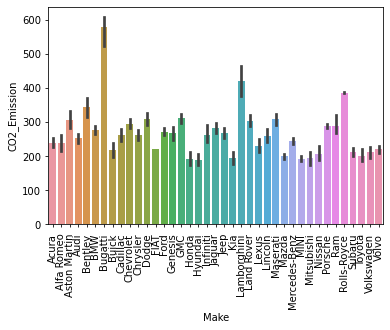

In [226]:
# Make에 따라 CO2_Emission 차이가 있을까 확인
sns.barplot(
    data= df,
    x= "Make",
    y= "CO2_Emission"
)
plt.xticks(rotation=90)
plt.tick_params(axis='x', length=3, pad=6, labelsize=10, )
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


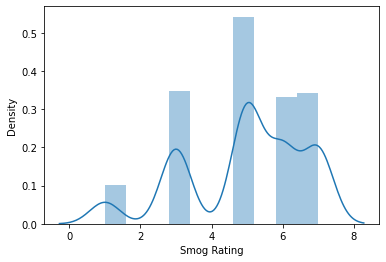

In [64]:
sns.distplot(df["Smog Rating"]);
plt.show();

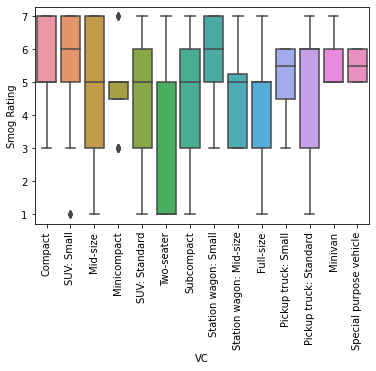

In [80]:
sns.boxplot(x = "VC", y = "Smog Rating",data = df1)
plt.xticks(rotation=90)
plt.show()

In [81]:
df1.describe()

,Engine Size(L),Cylinders,FC_City,FC_Hwy,FC_Comb,FC_CombMPG,CO2_Emission,CO2 Rating,Smog Rating
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


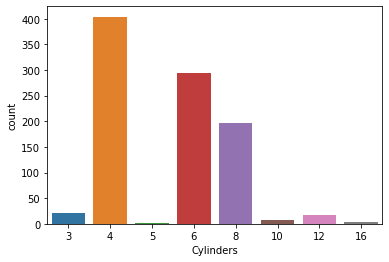

In [83]:
sns.countplot(data=df,x="Cylinders")
plt.show()

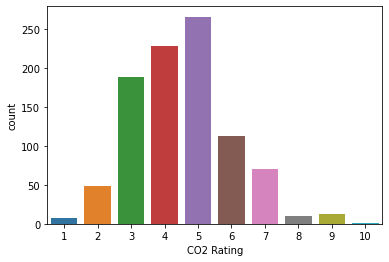

In [86]:
sns.countplot(data=df,x="CO2 Rating")
plt.show()

In [87]:
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_valid, y_train, y_valid = train_test_split(df, df["CO2_Emission"],test_size=0.2, random_state=1)

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
model = RandomForestRegressor()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Model Year      946 non-null    int64  
 1   Make            946 non-null    object 
 2   Model           946 non-null    object 
 3   VC              946 non-null    object 
 4   Engine Size(L)  946 non-null    float64
 5   Cylinders       946 non-null    int64  
 6   Transmission    946 non-null    object 
 7   Fuel Type       946 non-null    object 
 8   FC_City         946 non-null    float64
 9   FC_Hwy          946 non-null    float64
 10  FC_Comb         946 non-null    float64
 11  FC_CombMPG      946 non-null    int64  
 12  CO2_Emission    946 non-null    int64  
 13  CO2 Rating      946 non-null    int64  
 14  Smog Rating     946 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 111.0+ KB


In [107]:
x_train = x_train.loc[:, ["Cylinders", "FC_City", "FC_Hwy", "FC_Comb", "FC_CombMPG", "Smog Rating"]]
model.fit(x_train, y_train)

RandomForestRegressor()

In [108]:
print(model.score(x_train, y_train))

0.9963572297755078


In [109]:
x_valid = x_valid.loc[:, ["Cylinders", "FC_City", "FC_Hwy", "FC_Comb", "FC_CombMPG", "Smog Rating"]]

In [110]:
print(model.score(x_valid, y_valid))

0.9936551459865776


In [113]:
model.predict(x_valid)

array([345.16      , 382.18      , 327.08      , 286.145     ,
       252.94      , 226.86      , 237.17      , 342.55692308,
       219.36333333, 279.04      , 222.29      , 298.595     ,
       197.07      , 322.        , 170.05      , 232.66      ,
       322.        , 186.5675    , 174.13      , 224.08      ,
       327.08      , 218.75      , 164.59      , 293.67      ,
       183.31      , 291.16      , 200.68      , 221.37      ,
       219.36333333, 167.94      , 216.34466667, 280.56      ,
       321.81      , 170.07      , 346.23      , 319.06      ,
       241.92      , 208.13      , 345.16      , 218.195     ,
       213.68666667, 221.38      , 340.04      , 304.16      ,
       330.29      , 267.66      , 189.71      , 170.05      ,
       276.95      , 242.33      , 241.78      , 354.36055556,
       192.61      , 243.93      , 221.49      , 213.818     ,
       274.0854044 , 382.1       , 255.93      , 263.28      ,
       258.85      , 224.83      , 259.28      , 259.73

In [120]:
model.feature_importances_

array([0.0051745 , 0.08869527, 0.00485412, 0.84151148, 0.05467192,
       0.00509271])

In [139]:
a = pd.Series(model.feature_importances_).reset_index()
a["index"] = ["Cylinders", "FC_City", "FC_Hwy", "FC_Comb", "FC_CombMPG", "Smog Rating"]
a = a.rename({"index":"features", 0:"Importance"}, axis=1)

In [145]:
a = a.sort_values(by="Importance", ascending=False)

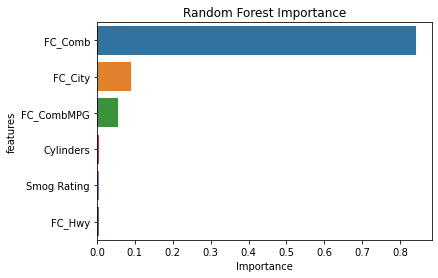

In [222]:
sns.barplot(
    data= a,
    x= "Importance",
    y= "features"
)
plt.title("Random Forest Importance")
plt.show()